In [3]:
import os,sys
os.chdir('C:\\Users\\Sebas\\VSCProjects\\MLResearch')
print(os.getcwd())

C:\Users\Sebas\VSCProjects\MLResearch


In [4]:
from results import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
from Scripts.functions import aggregated_hist,report_results,get_stats_agg
from tabulate import tabulate

# **ResNet18**

## ResNet18 - Trained on MNIST, Evaluated on MNIST

In [65]:
execution_id = '2024-03-03-12-18-11'
model,dataset = 'resnet18', 'mnist'
model_path = f'/results/{model}/{dataset}/model_{model}_{dataset}.pth'
result_path = f'.\\results\\resnet18\\mnist\\2024-03-03-12-18-11\\results.json'
print(result_path)


.\results\resnet18\mnist\2024-03-03-12-18-11\results.json


In [66]:
with open(result_path, 'r') as f:
    content = f.read()

json_objects = content.split(',\n')

for obj in json_objects:
    try:
        data = json.loads(obj)
        if data.get('Execution_ID') == execution_id:
            cosine_similarity = data.get('cosine_similarity')
            adj_cosine_similarity = data.get('adj_cos_sim')
            l2_distance = data.get('L2_distance')

    except json.JSONDecodeError:
        print("Error decoding json object. Skipping.")

Error decoding json object. Skipping.


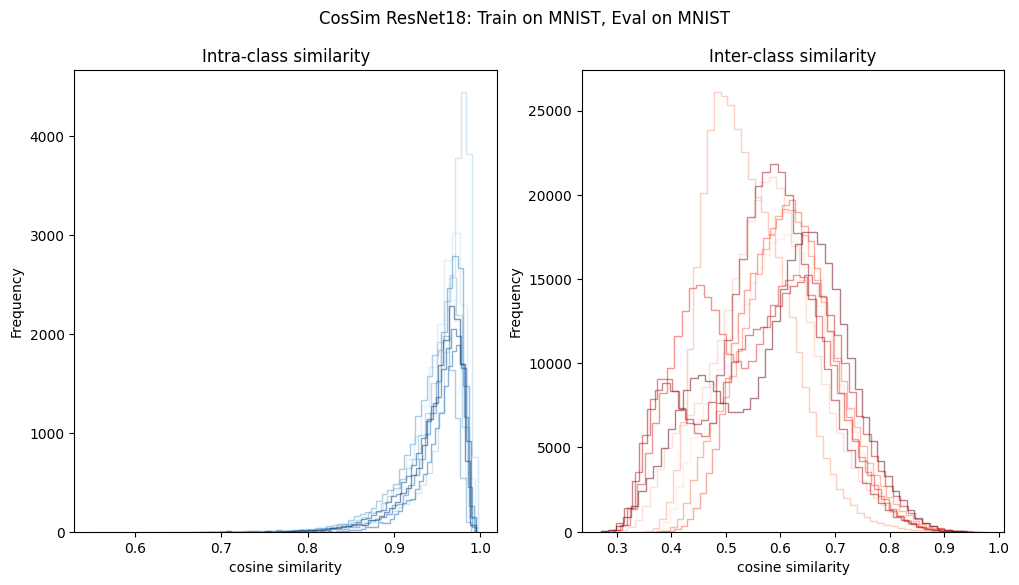

Overall Statistics:
Intra-class Similarity: Mean = 0.9493083514630365, Std = 0.03266326793435772, Var = 0.0010668890721516411
Inter-class similarity: Mean = 0.583246046834437, Std = 0.10151263961327041, Var = 0.010304816001253716



In [67]:
aggregated_hist(cosine_similarity,title='CosSim ResNet18: Train on MNIST, Eval on MNIST')
#get_stats_agg(cosine_similarity)
intra_μ, intra_σ, inter_μ, inter_σ = get_stats_agg(cosine_similarity)

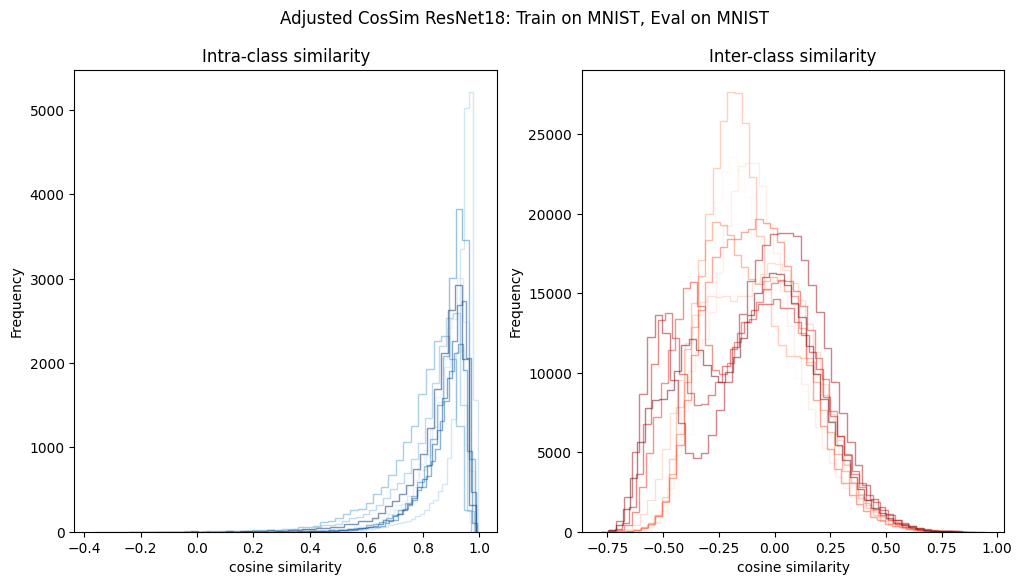

Overall Statistics:
Intra-class Similarity: Mean = 0.8596342099723095, Std = 0.10526930078508812, Var = 0.011081625687781352
Inter-class similarity: Mean = -0.09354559422374885, Std = 0.2391021803886348, Var = 0.05716985266659925



In [68]:

aggregated_hist(adj_cosine_similarity, title='Adjusted CosSim ResNet18: Train on MNIST, Eval on MNIST')
#get_stats_agg(adj_cosine_similarity)
adj_intra_μ,adj_intra_σ,adj_inter_μ,adj_inter_σ  = get_stats_agg(adj_cosine_similarity)


In [69]:
ts_path = f'.\\results\\{model}\\{dataset}\\{execution_id}\\training_settings.json'
with open(ts_path, 'r') as f:
    content = f.read()

data = json.loads(content)
training_settings = pd.DataFrame(data, index=[0])

print(tabulate(training_settings,headers='keys',tablefmt='pretty'))
report_results(model=data.get('model'),train_set=data.get('train_dataset'),eval_set=data.get('train_dataset'),intra_μ=intra_μ,intra_σ=intra_σ,inter_μ=inter_μ,inter_σ=inter_σ,adj_intra_μ=adj_intra_μ,adj_intra_σ=adj_intra_σ,adj_inter_μ=adj_inter_μ,adj_inter_σ=adj_inter_σ)

+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+
|   |  model   | train_dataset | num_epochs | optimizer |  loss_function   | learning_rate | batch_size | weight_decay | entry_stride | layer_norm | proto_layer | scale | channels |
+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+
| 0 | resnet18 |     mnist     |     10     |    SGD    | CrossEntropyLoss |     0.001     |     64     |      0       |      1       |   False    |      4      |  64   |    1     |
+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+


## ResNet18 - Trained on FSHN, Evaluated on FSHN

In [70]:
execution_id = '2024-03-03-12-35-59'
model,dataset = 'resnet18', 'fashion_mnist'
model_path = f'./results/{model}/{dataset}/model_{model}_{dataset}.pth'
result_path = f'./results/{model}/{dataset}/{execution_id}/results.json'
print(result_path)

./results/resnet18/fashion_mnist/2024-03-03-12-35-59/results.json


In [71]:
with open(result_path, 'r') as f:
    content = f.read()

json_objects = content.split(',\n')
for i,obj in enumerate(json_objects):
    try:
        data = json.loads(obj)
        if data.get('Execution_ID') == execution_id:
            cosine_similarity = data.get('cosine_similarity')
            adj_cosine_similarity = data.get('adj_cos_sim')
            l2_distance = data.get('L2_distance')

    except json.JSONDecodeError:
        print("Error decoding json object. Skipping.")

Error decoding json object. Skipping.


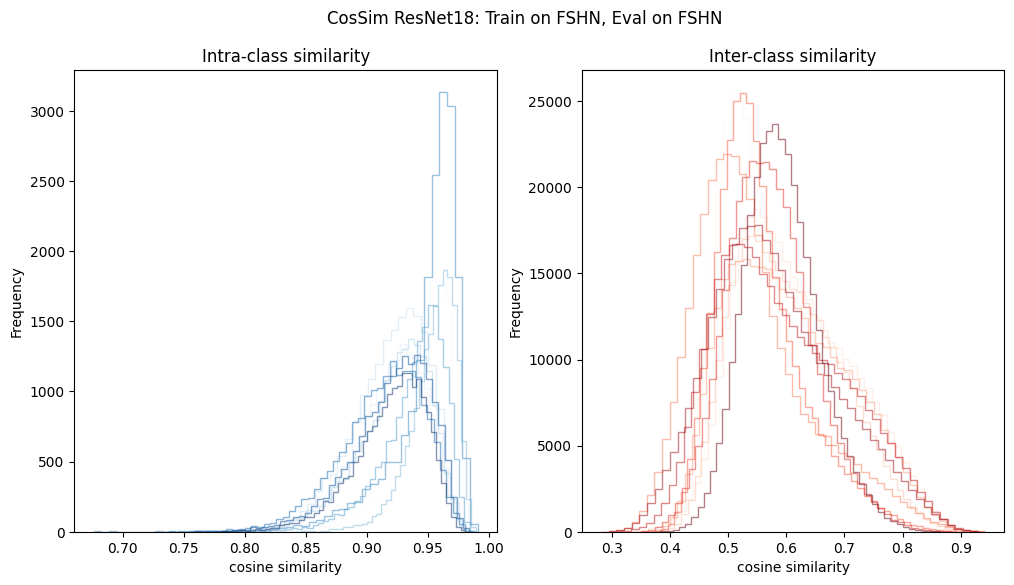

Overall Statistics:
Intra-class Similarity: Mean = 0.929694773432047, Std = 0.03224997839354099, Var = 0.0010400611063838608
Inter-class similarity: Mean = 0.5813450660137506, Std = 0.09445894620636362, Var = 0.008922492518416696



In [72]:
aggregated_hist(cosine_similarity,title='CosSim ResNet18: Train on FSHN, Eval on FSHN')
#get_stats_agg(cosine_similarity)
intra_μ,intra_σ,inter_μ,inter_σ = get_stats_agg(cosine_similarity)

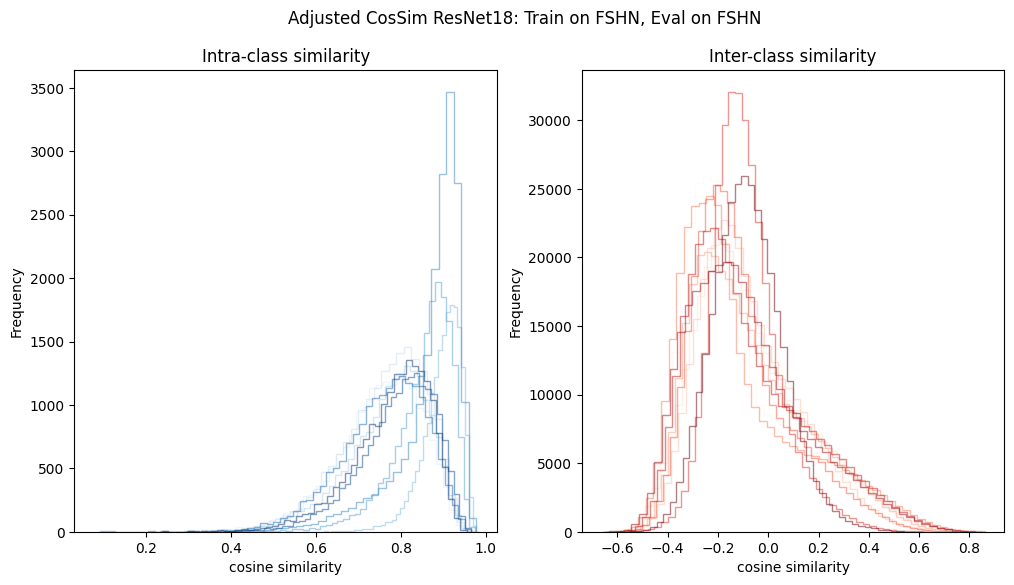

Overall Statistics:
Intra-class Similarity: Mean = 0.8093289456126881, Std = 0.10030250322750987, Var = 0.010060592153704627
Inter-class similarity: Mean = -0.08963669780183013, Std = 0.21014709840841864, Var = 0.04416180296947759



In [73]:
aggregated_hist(adj_cosine_similarity,title='Adjusted CosSim ResNet18: Train on FSHN, Eval on FSHN')
#get_stats_agg(adj_cosine_similarity)
adj_intra_μ,adj_intra_σ,adj_inter_μ,adj_inter_σ  = get_stats_agg(adj_cosine_similarity)

In [74]:
ts_path = f'.\\results\\{model}\\{dataset}\\{execution_id}\\training_settings.json'
with open(ts_path, 'r') as f:
    content = f.read()

data = json.loads(content)
training_settings = pd.DataFrame(data, index=[0])

print(tabulate(training_settings,headers='keys',tablefmt='pretty'))
report_results(model=data.get('model'),train_set=data.get('train_dataset'),eval_set=data.get('train_dataset'),intra_μ=intra_μ,intra_σ=intra_σ,inter_μ=inter_μ,inter_σ=inter_σ,adj_intra_μ=adj_intra_μ,adj_intra_σ=adj_intra_σ,adj_inter_μ=adj_inter_μ,adj_inter_σ=adj_inter_σ)

+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+
|   |  model   | train_dataset | num_epochs | optimizer |  loss_function   | learning_rate | batch_size | weight_decay | entry_stride | layer_norm | proto_layer | scale | channels |
+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+
| 0 | resnet18 | fashion_mnist |     20     |    SGD    | CrossEntropyLoss |     0.001     |     64     |      0       |      1       |   False    |      4      |  64   |    1     |
+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+


## ResNet18 - Trained on MNIST, Evaluated on FSHN

In [75]:
execution_id = '2024-03-04-11-27-40'
model,dataset = 'resnet18', 'mnist'
model_path = f'./results/{model}/{dataset}/model_{model}_{dataset}.pth'
result_path = f'./results/{model}/{dataset}/{execution_id}/results.json'
print(result_path)

./results/resnet18/mnist/2024-03-04-11-27-40/results.json


In [76]:
with open(result_path, 'r') as f:
    content = f.read()

json_objects = content.split(',\n')

for i,obj in enumerate(json_objects):
    try:
        data = json.loads(obj)
        if data.get('Execution_ID') == execution_id:
            cosine_similarity = data.get('cosine_similarity')
            adj_cosine_similarity = data.get('adj_cos_sim')
            l2_distance = data.get('L2_distance')

    except json.JSONDecodeError:
        print("Error decoding json object. Skipping.")

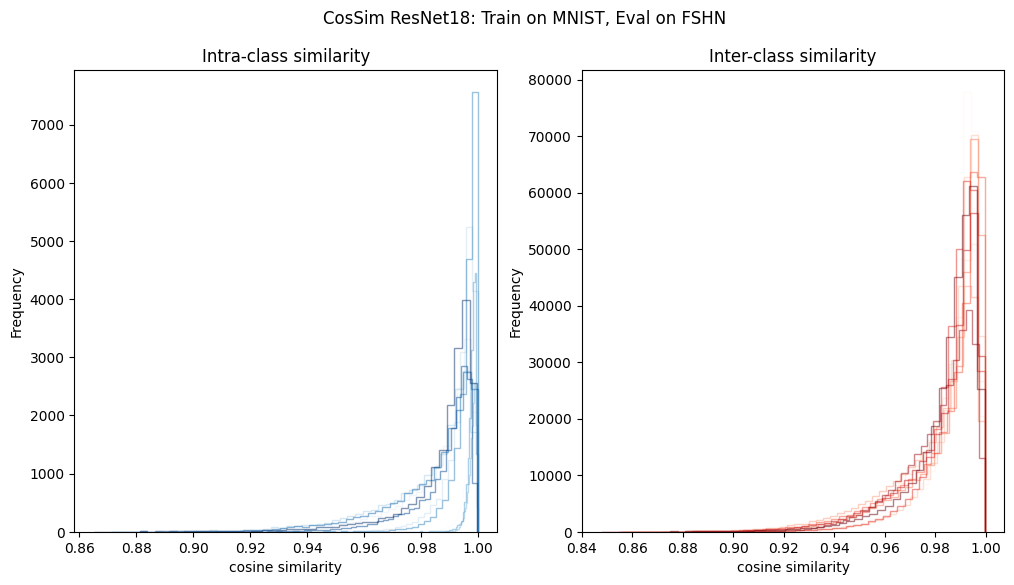

Overall Statistics:
Intra-class Similarity: Mean = 0.9905548216691563, Std = 0.012570396154390923, Var = 0.0001580148594783261
Inter-class similarity: Mean = 0.9838575076173731, Std = 0.015358349972824484, Var = 0.00023587891388775786



In [77]:
aggregated_hist(cosine_similarity,title='CosSim ResNet18: Train on MNIST, Eval on FSHN')
#get_stats_agg(cosine_similarity)
intra_μ,intra_σ,inter_μ,inter_σ = get_stats_agg(cosine_similarity)

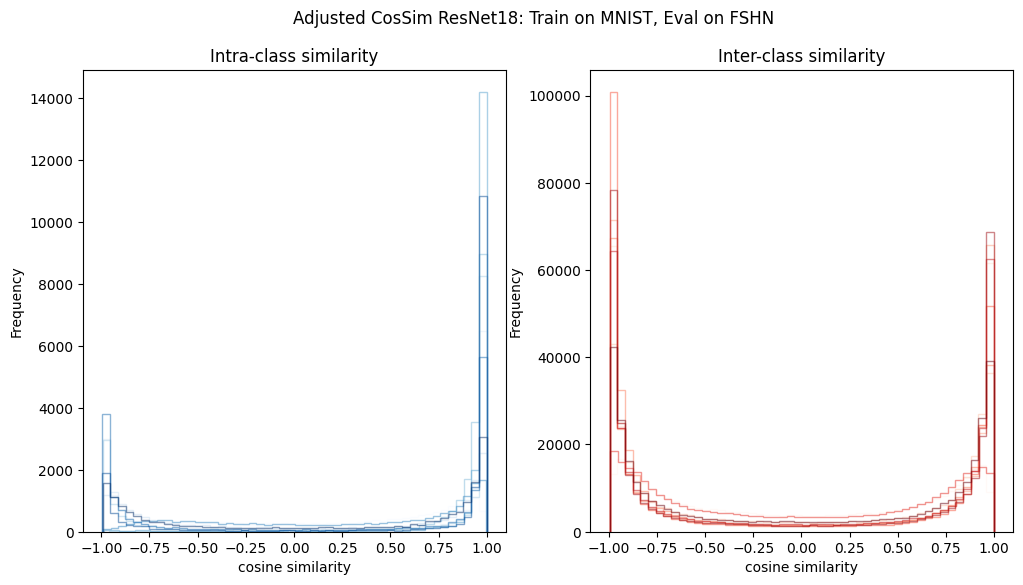

Overall Statistics:
Intra-class Similarity: Mean = 0.35727684398835263, Std = 0.7623980135827471, Var = 0.5812507311149187
Inter-class similarity: Mean = -0.03616122124293848, Std = 0.8117301360189929, Var = 0.6589058137214127



In [78]:
aggregated_hist(adj_cosine_similarity,title='Adjusted CosSim ResNet18: Train on MNIST, Eval on FSHN')
#get_stats_agg(adj_cosine_similarity)
adj_intra_μ,adj_intra_σ,adj_inter_μ,adj_inter_σ  = get_stats_agg(adj_cosine_similarity)

In [79]:
report_results(model=model,train_set=dataset,eval_set='FSHN',intra_μ=intra_μ,intra_σ=intra_σ,inter_μ=inter_μ,inter_σ=inter_σ,adj_intra_μ=adj_intra_μ,adj_intra_σ=adj_intra_σ,adj_inter_μ=adj_inter_μ,adj_inter_σ=adj_inter_σ)

## ResNet18 - Trained on FSHN, Evaluated on MNIST

In [80]:
execution_id = '2024-03-04-11-39-35'
model,dataset = 'resnet18', 'fashion_mnist'
model_path = f'./results/{model}/{dataset}/model_{model}_{dataset}.pth'
result_path = f'./results/{model}/{dataset}/{execution_id}/results.json'
print(result_path)

./results/resnet18/fashion_mnist/2024-03-04-11-39-35/results.json


In [81]:
with open(result_path, 'r') as f:
    content = f.read()

json_objects = content.split(',\n')

for i,obj in enumerate(json_objects):
    try:
        data = json.loads(obj)
        if data.get('Execution_ID') == execution_id:
            cosine_similarity = data.get('cosine_similarity')
            adj_cosine_similarity = data.get('adj_cos_sim')
            l2_distance = data.get('L2_distance')

    except json.JSONDecodeError:
        print("Error decoding json object. Skipping.")

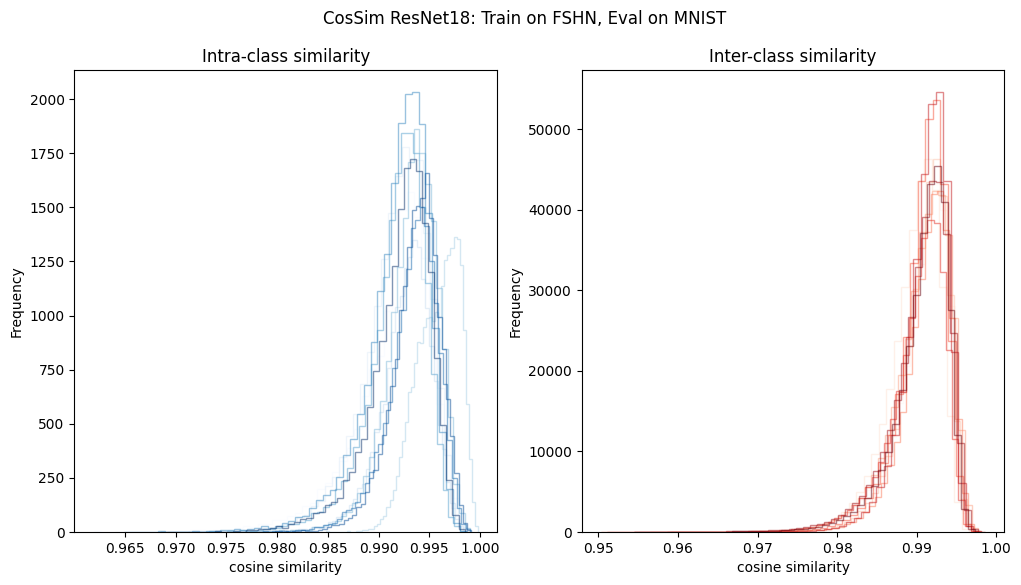

Overall Statistics:
Intra-class Similarity: Mean = 0.9928560009848467, Std = 0.003102459598384823, Var = 9.625255559610117e-06
Inter-class similarity: Mean = 0.9905844563818583, Std = 0.003378521097462187, Var = 1.1414404805997099e-05



In [82]:
aggregated_hist(cosine_similarity,title='CosSim ResNet18: Train on FSHN, Eval on MNIST')
#get_stats_agg(cosine_similarity)
intra_μ,intra_σ,inter_μ,inter_σ = get_stats_agg(cosine_similarity)

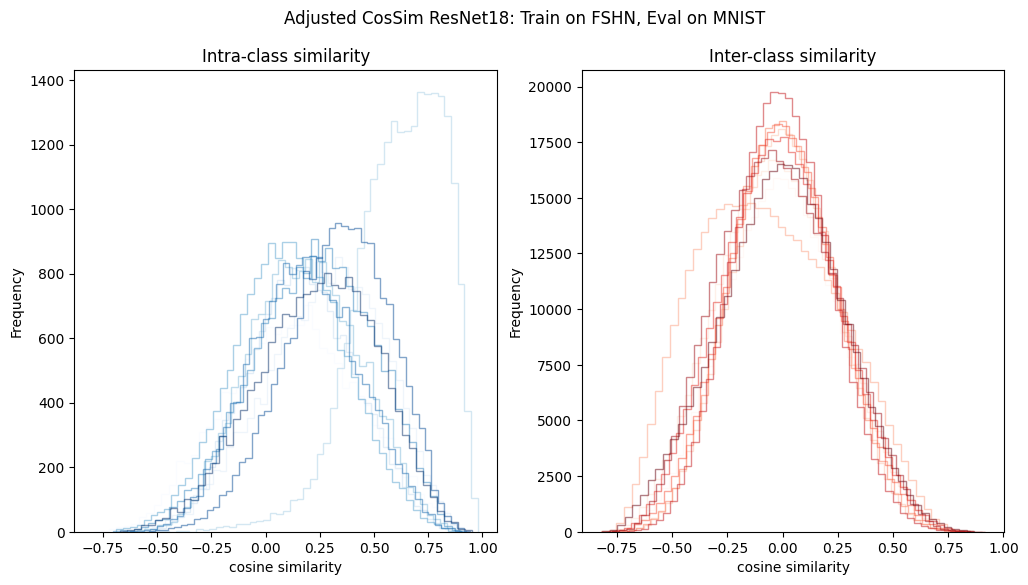

Overall Statistics:
Intra-class Similarity: Mean = 0.2565780211049513, Std = 0.29359117061420137, Var = 0.0861957754626171
Inter-class similarity: Mean = -0.012753035202466699, Std = 0.2568389293307994, Var = 0.06596623561979137



In [83]:
aggregated_hist(adj_cosine_similarity,title='Adjusted CosSim ResNet18: Train on FSHN, Eval on MNIST')
#get_stats_agg(adj_cosine_similarity)
adj_intra_μ,adj_intra_σ,adj_inter_μ,adj_inter_σ  = get_stats_agg(adj_cosine_similarity)

In [84]:
report_results(model=model,train_set=dataset,eval_set='MNIST',intra_μ=intra_μ,intra_σ=intra_σ,inter_μ=inter_μ,inter_σ=inter_σ,adj_intra_μ=adj_intra_μ,adj_intra_σ=adj_intra_σ,adj_inter_μ=adj_inter_μ,adj_inter_σ=adj_inter_σ)

## ResNet18 - Trained on CIFAR10, Evaluated on CIFAR10

In [85]:
execution_id = '2024-03-03-12-56-23'
model,dataset = 'resnet18', 'cifar10'
model_path = f'./results/{model}/{dataset}/model_{model}_{dataset}.pth'
result_path = f'./results/{model}/{dataset}/{execution_id}/results.json'
print(result_path)

./results/resnet18/cifar10/2024-03-03-12-56-23/results.json


In [86]:
with open(result_path, 'r') as f:
    content = f.read()

json_objects = content.split(',\n')

for i,obj in enumerate(json_objects):
    try:
        data = json.loads(obj)
        if data.get('Execution_ID') == execution_id:
            cosine_similarity = data.get('cosine_similarity')
            adj_cosine_similarity = data.get('adj_cos_sim')
            l2_distance = data.get('L2_distance')

    except json.JSONDecodeError:
        print("Error decoding json object. Skipping.")

Error decoding json object. Skipping.


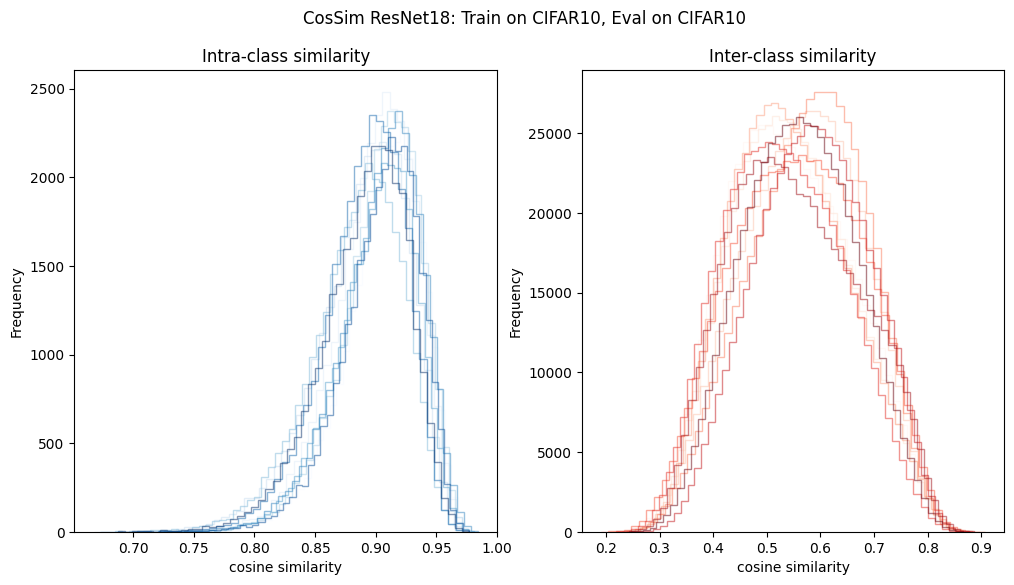

Overall Statistics:
Intra-class Similarity: Mean = 0.8970017775683977, Std = 0.03492426799325231, Var = 0.0012197044948645077
Inter-class similarity: Mean = 0.5560960335504634, Std = 0.11066214021009621, Var = 0.012246109275878991



In [87]:
aggregated_hist(cosine_similarity,title='CosSim ResNet18: Train on CIFAR10, Eval on CIFAR10')
#get_stats_agg(cosine_similarity)
intra_μ,intra_σ,inter_μ,inter_σ = get_stats_agg(cosine_similarity)

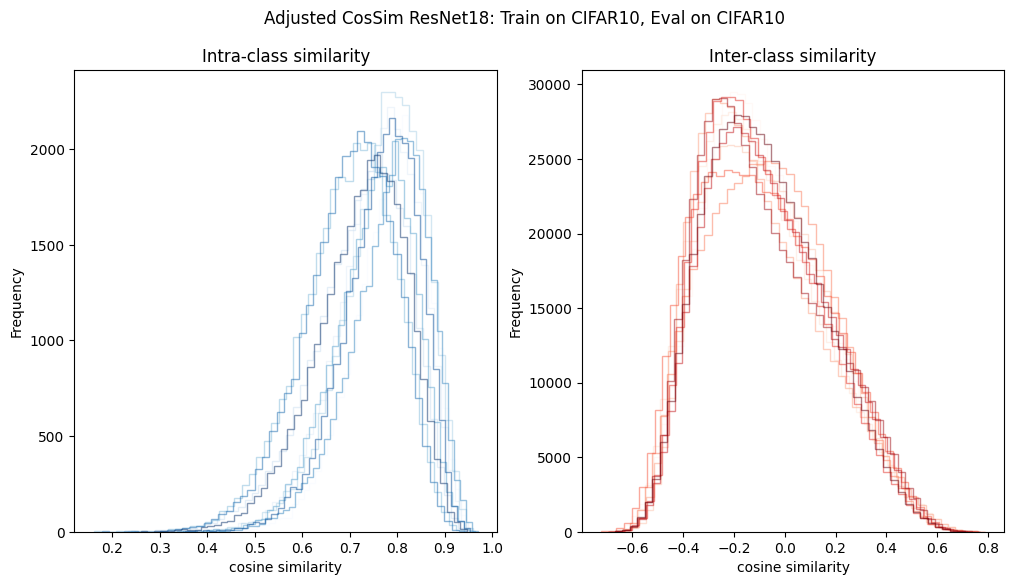

Overall Statistics:
Intra-class Similarity: Mean = 0.7451256482065101, Std = 0.0941814750389977, Var = 0.008870150240521346
Inter-class similarity: Mean = -0.08224906873238043, Std = 0.2373915196798677, Var = 0.05635473361591702



In [88]:
aggregated_hist(adj_cosine_similarity,title='Adjusted CosSim ResNet18: Train on CIFAR10, Eval on CIFAR10')
#get_stats_agg(adj_cosine_similarity)
adj_intra_μ,adj_intra_σ,adj_inter_μ,adj_inter_σ  = get_stats_agg(adj_cosine_similarity)

In [89]:
ts_path = f'.\\results\\{model}\\{dataset}\\{execution_id}\\training_settings.json'
with open(ts_path, 'r') as f:
    content = f.read()

data = json.loads(content)
training_settings = pd.DataFrame(data, index=[0])

print(tabulate(training_settings,headers='keys',tablefmt='pretty'))
report_results(model=data.get('model'),train_set=data.get('train_dataset'),eval_set=data.get('train_dataset'),intra_μ=intra_μ,intra_σ=intra_σ,inter_μ=inter_μ,inter_σ=inter_σ,adj_intra_μ=adj_intra_μ,adj_intra_σ=adj_intra_σ,adj_inter_μ=adj_inter_μ,adj_inter_σ=adj_inter_σ)

+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+
|   |  model   | train_dataset | num_epochs | optimizer |  loss_function   | learning_rate | batch_size | weight_decay | entry_stride | layer_norm | proto_layer | scale | channels |
+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+
| 0 | resnet18 |    cifar10    |     88     |    SGD    | CrossEntropyLoss |     0.001     |    128     |      0       |      1       |   False    |      4      |  64   |    3     |
+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+


## ResNet18 - Trained on CIFAR100, Evaluated on CIFAR100

In [90]:
execution_id = '2024-03-03-19-33-09'
model,dataset = 'resnet18', 'cifar100'
model_path = f'./results/{model}/{dataset}/model_{model}_{dataset}.pth'
result_path = f'./results/{model}/{dataset}/{execution_id}/results.json'
print(result_path)

./results/resnet18/cifar100/2024-03-03-19-33-09/results.json


In [91]:
with open(result_path, 'r') as f:
    content = f.read()

json_objects = content.split(',\n')

for i,obj in enumerate(json_objects):
    try:
        data = json.loads(obj)
        if data.get('Execution_ID') == execution_id:
            cosine_similarity = data.get('cosine_similarity')
            adj_cosine_similarity = data.get('adj_cos_sim')
            l2_distance = data.get('L2_distance')

    except json.JSONDecodeError:
        print("Error decoding json object. Skipping.")

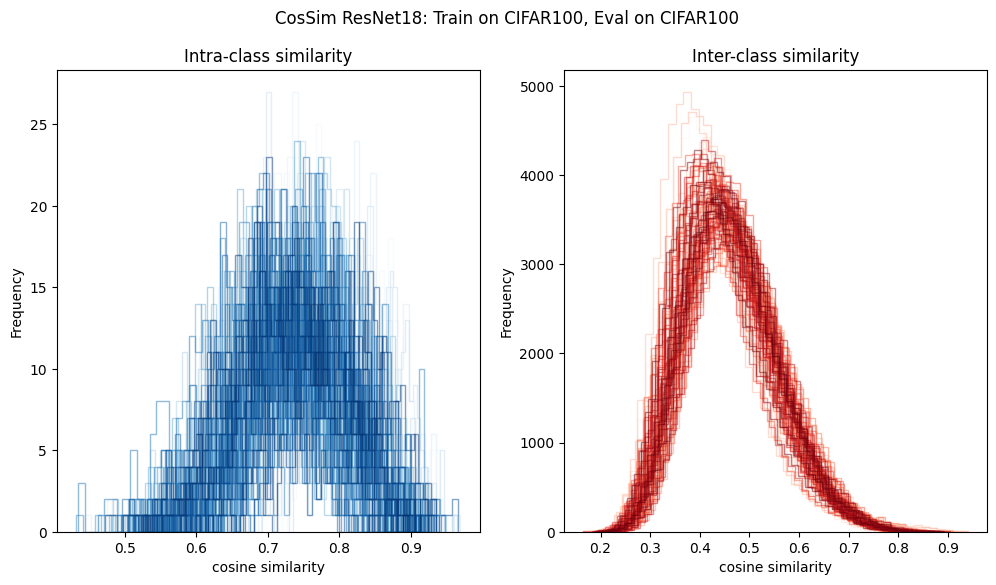

Overall Statistics:
Intra-class Similarity: Mean = 0.7376278935891387, Std = 0.07597313238447816, Var = 0.005771916844309445
Inter-class similarity: Mean = 0.45937751045210784, Std = 0.09379100423083903, Var = 0.008796752474629264



In [92]:
aggregated_hist(cosine_similarity,title='CosSim ResNet18: Train on CIFAR100, Eval on CIFAR100')
#get_stats_agg(cosine_similarity)
intra_μ,intra_σ,inter_μ,inter_σ = get_stats_agg(cosine_similarity)

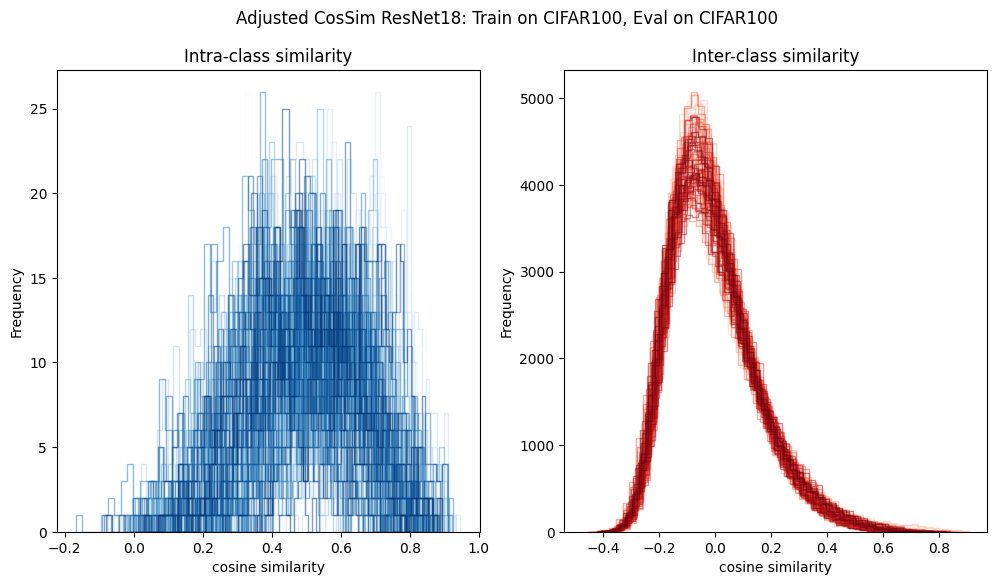

Overall Statistics:
Intra-class Similarity: Mean = 0.5020433369046217, Std = 0.16459593252071728, Var = 0.027091821002364517
Inter-class similarity: Mean = -0.004989557679979878, Std = 0.15558358403896266, Var = 0.024206251622408956



In [93]:
aggregated_hist(adj_cosine_similarity,title='Adjusted CosSim ResNet18: Train on CIFAR100, Eval on CIFAR100')
#get_stats_agg(adj_cosine_similarity)
adj_intra_μ,adj_intra_σ,adj_inter_μ,adj_inter_σ  = get_stats_agg(adj_cosine_similarity)

In [94]:
ts_path = f'.\\results\\{model}\\{dataset}\\{execution_id}\\training_settings.json'
with open(ts_path, 'r') as f:
    content = f.read()

data = json.loads(content)
training_settings = pd.DataFrame(data, index=[0])

print(tabulate(training_settings,headers='keys',tablefmt='pretty'))
report_results(model=data.get('model'),train_set=data.get('train_dataset'),eval_set=data.get('train_dataset'),intra_μ=intra_μ,intra_σ=intra_σ,inter_μ=inter_μ,inter_σ=inter_σ,adj_intra_μ=adj_intra_μ,adj_intra_σ=adj_intra_σ,adj_inter_μ=adj_inter_μ,adj_inter_σ=adj_inter_σ)

+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+
|   |  model   | train_dataset | num_epochs | optimizer |  loss_function   | learning_rate | batch_size | weight_decay | entry_stride | layer_norm | proto_layer | scale | channels |
+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+
| 0 | resnet18 |   cifar100    |    259     |    SGD    | CrossEntropyLoss |     0.001     |    128     |      0       |      1       |   False    |      4      |  64   |    3     |
+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+


## ResNet18 - Trained on CIFAR10, Evaluated on CIFAR100

In [95]:
execution_id = '2024-03-04-11-51-30'
model,dataset = 'resnet18', 'cifar10'
model_path = f'./results/{model}/{dataset}/model_{model}_{dataset}.pth'
result_path = f'./results/{model}/{dataset}/{execution_id}/results.json'
print(result_path)

./results/resnet18/cifar10/2024-03-04-11-51-30/results.json


In [96]:
with open(result_path, 'r') as f:
    content = f.read()

json_objects = content.split(',\n')

for i,obj in enumerate(json_objects):
    try:
        data = json.loads(obj)
        if data.get('Execution_ID') == execution_id:
            cosine_similarity = data.get('cosine_similarity')
            adj_cosine_similarity = data.get('adj_cos_sim')
            l2_distance = data.get('L2_distance')

    except json.JSONDecodeError:
        print("Error decoding json object. Skipping.")

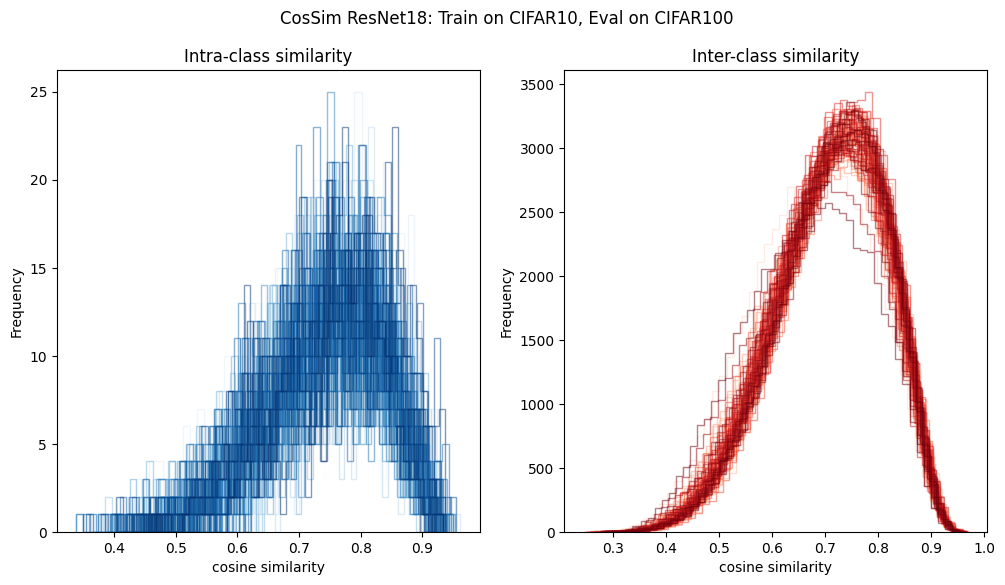

Overall Statistics:
Intra-class Similarity: Mean = 0.7423473642188965, Std = 0.09642637483615218, Var = 0.009298045764042123
Inter-class similarity: Mean = 0.7072095980074552, Std = 0.10429320494245779, Var = 0.010877072597169503



In [97]:
aggregated_hist(cosine_similarity,title='CosSim ResNet18: Train on CIFAR10, Eval on CIFAR100')
#get_stats_agg(cosine_similarity)
intra_μ,intra_σ,inter_μ,inter_σ = get_stats_agg(cosine_similarity)

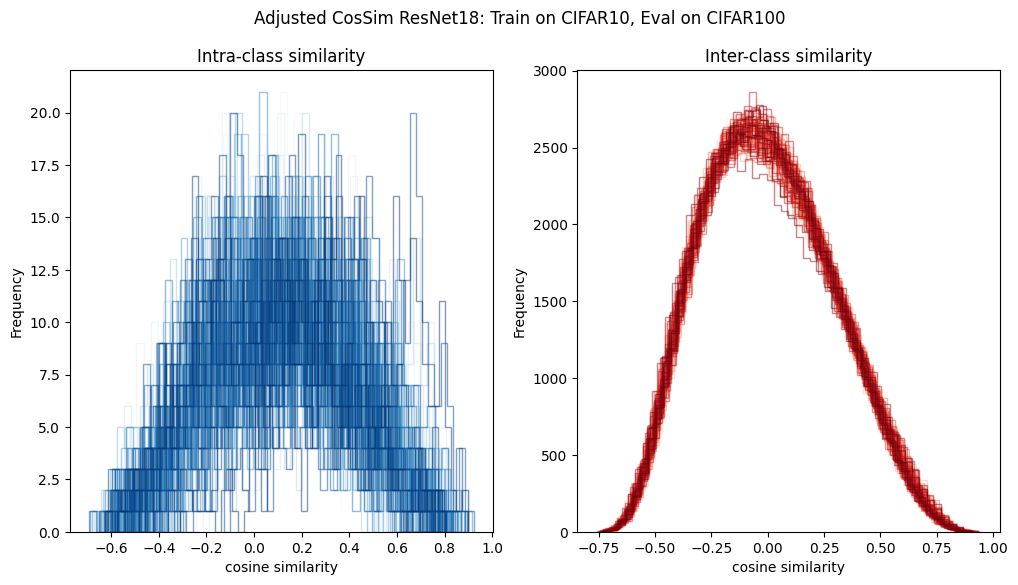

Overall Statistics:
Intra-class Similarity: Mean = 0.1152610820294674, Std = 0.29905111781208277, Var = 0.0894315710646562
Inter-class similarity: Mean = -0.00026872604091281757, Std = 0.2875404553825825, Var = 0.08267951348162292



In [98]:
aggregated_hist(adj_cosine_similarity,title='Adjusted CosSim ResNet18: Train on CIFAR10, Eval on CIFAR100')
#get_stats_agg(adj_cosine_similarity)
adj_intra_μ,adj_intra_σ,adj_inter_μ,adj_inter_σ  = get_stats_agg(adj_cosine_similarity)

In [99]:
report_results(model=model,train_set=dataset,eval_set='CIFAR100',intra_μ=intra_μ,intra_σ=intra_σ,inter_μ=inter_μ,inter_σ=inter_σ,adj_intra_μ=adj_intra_μ,adj_intra_σ=adj_intra_σ,adj_inter_μ=adj_inter_μ,adj_inter_σ=adj_inter_σ)

## ResNet18 - Trained on CIFAR100, Evaluated on CIFAR10

In [100]:
execution_id = '2024-03-04-12-10-47'
model,dataset = 'resnet18', 'cifar100'
model_path = f'./results/{model}/{dataset}/model_{model}_{dataset}.pth'
result_path = f'./results/{model}/{dataset}/{execution_id}/results.json'
print(result_path)

./results/resnet18/cifar100/2024-03-04-12-10-47/results.json


In [101]:
with open(result_path, 'r') as f:
    content = f.read()

json_objects = content.split(',\n')

for i,obj in enumerate(json_objects):
    try:
        data = json.loads(obj)
        if data.get('Execution_ID') == execution_id:
            cosine_similarity = data.get('cosine_similarity')
            adj_cosine_similarity = data.get('adj_cos_sim')
            l2_distance = data.get('L2_distance')

    except json.JSONDecodeError:
        print("Error decoding json object. Skipping.")

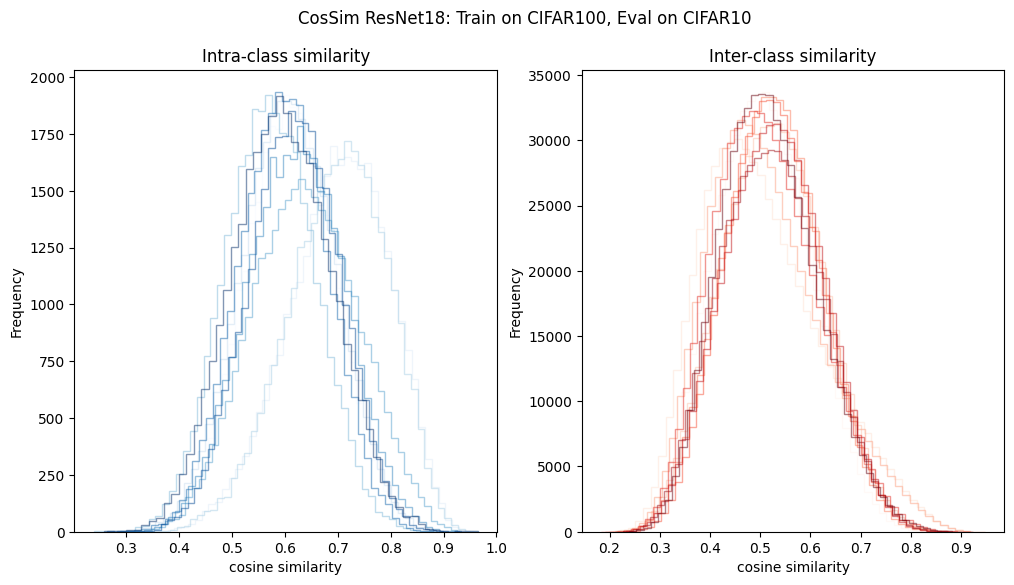

Overall Statistics:
Intra-class Similarity: Mean = 0.6250120523449514, Std = 0.09811643362927697, Var = 0.009626834548128313
Inter-class similarity: Mean = 0.5171160293456375, Std = 0.10053379064082925, Var = 0.010107043060614088



In [102]:
aggregated_hist(cosine_similarity,title='CosSim ResNet18: Train on CIFAR100, Eval on CIFAR10')
#get_stats_agg(cosine_similarity)
intra_μ,intra_σ,inter_μ,inter_σ = get_stats_agg(cosine_similarity)

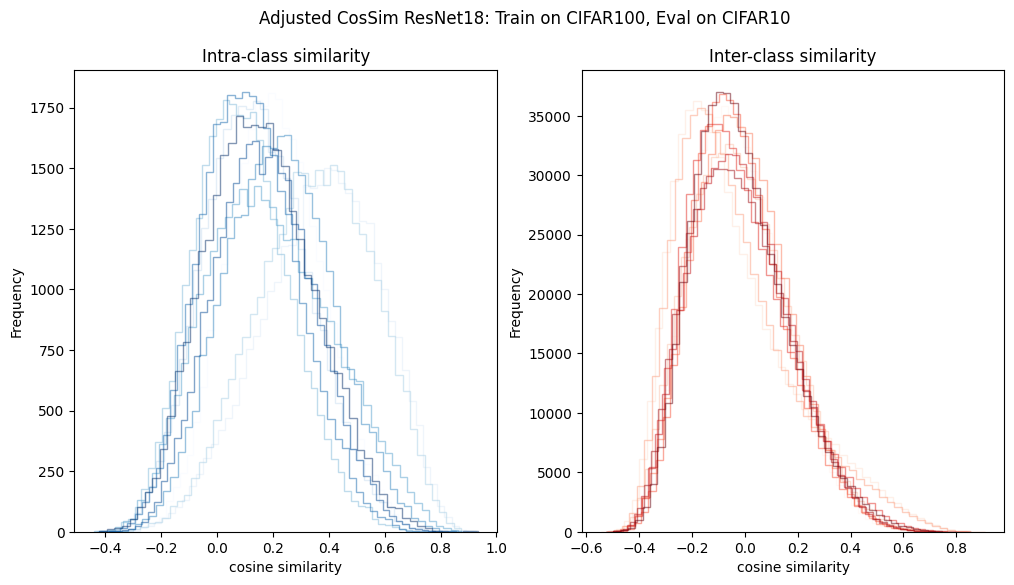

Overall Statistics:
Intra-class Similarity: Mean = 0.20233702141577897, Std = 0.20782348279480015, Var = 0.04319060000096059
Inter-class similarity: Mean = -0.02255706630257715, Std = 0.19036074052316418, Var = 0.036237211532527444



In [103]:
aggregated_hist(adj_cosine_similarity,title='Adjusted CosSim ResNet18: Train on CIFAR100, Eval on CIFAR10')
#get_stats_agg(adj_cosine_similarity)
adj_intra_μ,adj_intra_σ,adj_inter_μ,adj_inter_σ  = get_stats_agg(adj_cosine_similarity)

In [104]:
report_results(model=model,train_set=dataset,eval_set='CIFAR10',intra_μ=intra_μ,intra_σ=intra_σ,inter_μ=inter_μ,inter_σ=inter_σ,adj_intra_μ=adj_intra_μ,adj_intra_σ=adj_intra_σ,adj_inter_μ=adj_inter_μ,adj_inter_σ=adj_inter_σ)

# **DenseNet**

## DenseNet - Trained on CIFAR10, Evaluated on CIFAR10

In [105]:
execution_id = '2024-03-03-15-34-43'
model,dataset = 'densenet', 'cifar10'
model_path = f'./results/{model}/{dataset}/model_{model}_{dataset}.pth'
result_path = f'./results/{model}/{dataset}/{execution_id}/results.json'
print(result_path)

./results/densenet/cifar10/2024-03-03-15-34-43/results.json


In [106]:
with open(result_path, 'r') as f:
    content = f.read()

json_objects = content.split(',\n')

for i,obj in enumerate(json_objects):
    try:
        data = json.loads(obj)
        if data.get('Execution_ID') == execution_id:
            cosine_similarity = data.get('cosine_similarity')
            adj_cosine_similarity = data.get('adj_cos_sim')
            l2_distance = data.get('L2_distance')

    except json.JSONDecodeError:
        print("Error decoding json object. Skipping.")

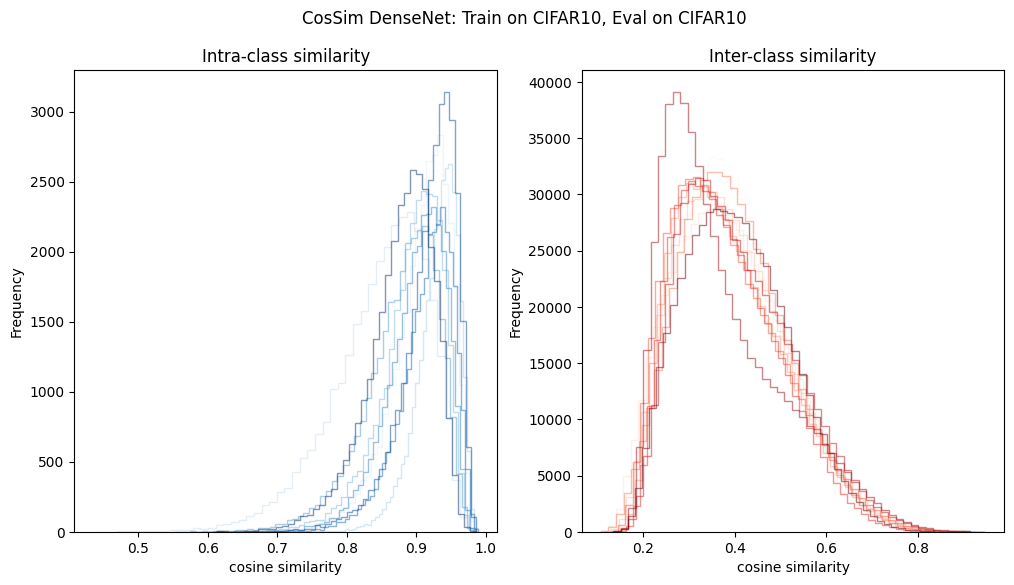

Overall Statistics:
Intra-class Similarity: Mean = 0.8977384650900786, Std = 0.05154114364459446, Var = 0.00265648948819272
Inter-class similarity: Mean = 0.39131196943652774, Std = 0.11882589686155766, Var = 0.01411959376495354



In [107]:
aggregated_hist(cosine_similarity,title='CosSim DenseNet: Train on CIFAR10, Eval on CIFAR10')
#get_stats_agg(cosine_similarity)
intra_μ,intra_σ,inter_μ,inter_σ = get_stats_agg(cosine_similarity)

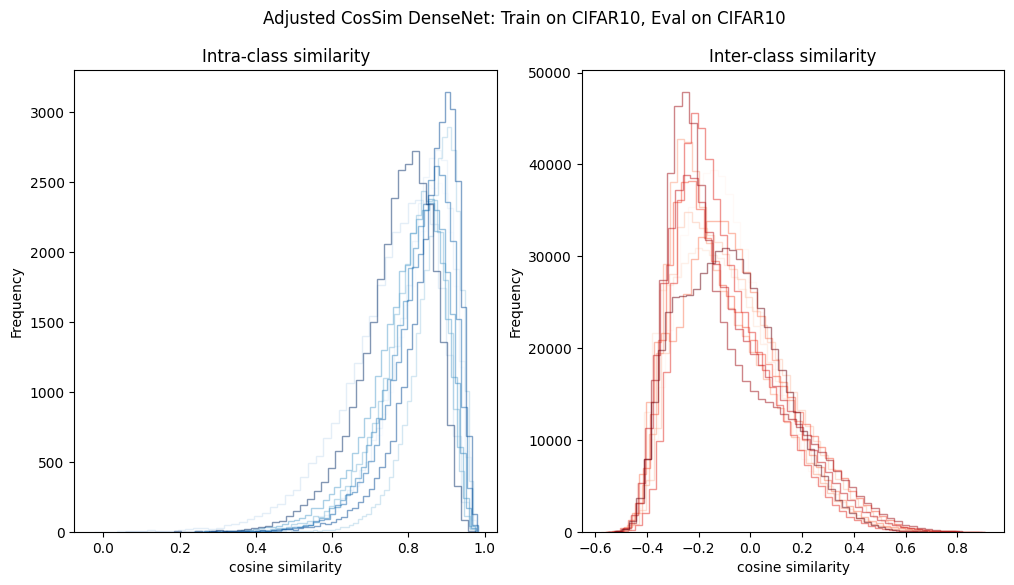

Overall Statistics:
Intra-class Similarity: Mean = 0.8144063806041991, Std = 0.09605156893353069, Var = 0.009225903894592798
Inter-class similarity: Mean = -0.0892615252935901, Std = 0.19585720495211428, Var = 0.0383600447316545



In [108]:
aggregated_hist(adj_cosine_similarity,title='Adjusted CosSim DenseNet: Train on CIFAR10, Eval on CIFAR10')
#get_stats_agg(adj_cosine_similarity)
adj_intra_μ,adj_intra_σ,adj_inter_μ,adj_inter_σ  = get_stats_agg(adj_cosine_similarity)

In [109]:
ts_path = f'.\\results\\{model}\\{dataset}\\{execution_id}\\training_settings.json'
with open(ts_path, 'r') as f:
    content = f.read()

data = json.loads(content)
training_settings = pd.DataFrame(data, index=[0])

print(tabulate(training_settings,headers='keys',tablefmt='pretty'))
report_results(model=data.get('model'),train_set=data.get('train_dataset'),eval_set=data.get('train_dataset'),intra_μ=intra_μ,intra_σ=intra_σ,inter_μ=inter_μ,inter_σ=inter_σ,adj_intra_μ=adj_intra_μ,adj_intra_σ=adj_intra_σ,adj_inter_μ=adj_inter_μ,adj_inter_σ=adj_inter_σ)

+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+
|   |  model   | train_dataset | num_epochs | optimizer |  loss_function   | learning_rate | batch_size | weight_decay | entry_stride | layer_norm | proto_layer | scale | channels |
+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+
| 0 | densenet |    cifar10    |     82     |    SGD    | CrossEntropyLoss |     0.001     |    128     |      0       |      1       |   False    |      4      |  32   |    3     |
+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+


## DenseNet - Trained on CIFAR100, Evaluated on CIFAR100

In [110]:
execution_id = '2024-03-04-11-44-47'
model,dataset = 'densenet', 'cifar100'
model_path = f'./results/{model}/{dataset}/model_{model}_{dataset}.pth'
result_path = f'./results/{model}/{dataset}/{execution_id}/results.json'
print(result_path)

./results/densenet/cifar100/2024-03-04-11-44-47/results.json


In [111]:
with open(result_path, 'r') as f:
    content = f.read()

json_objects = content.split(',\n')

for i,obj in enumerate(json_objects):
    try:
        data = json.loads(obj)
        if data.get('Execution_ID') == execution_id:
            cosine_similarity = data.get('cosine_similarity')
            adj_cosine_similarity = data.get('adj_cos_sim')
            l2_distance = data.get('L2_distance')

    except json.JSONDecodeError:
        print("Error decoding json object. Skipping.")

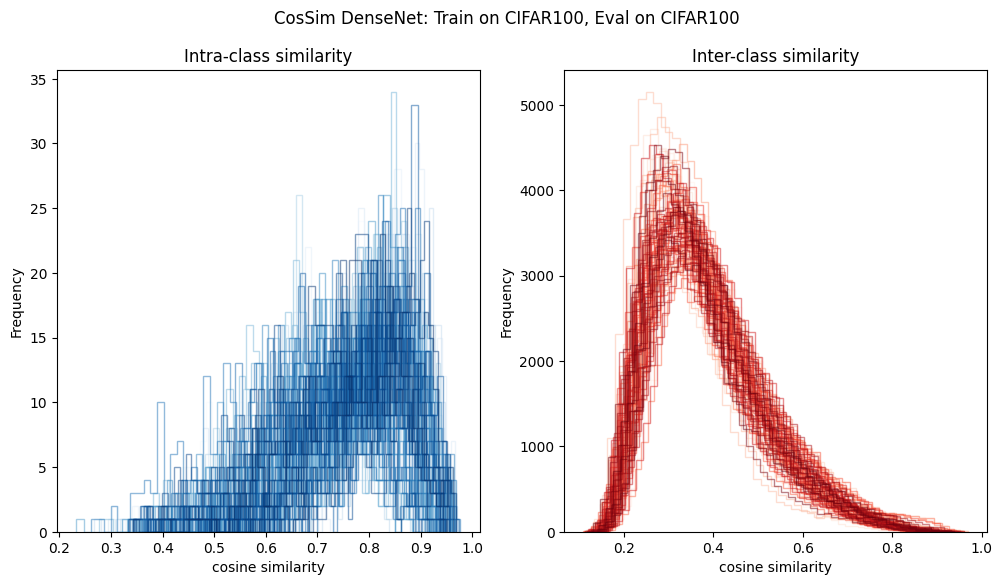

Overall Statistics:
Intra-class Similarity: Mean = 0.7591497210889211, Std = 0.11387442371599601, Var = 0.012967384376650196
Inter-class similarity: Mean = 0.383944238548094, Std = 0.12625440355930292, Var = 0.01594017441811532



In [112]:
aggregated_hist(cosine_similarity,title='CosSim DenseNet: Train on CIFAR100, Eval on CIFAR100')
intra_μ,intra_σ,inter_μ,inter_σ = get_stats_agg(cosine_similarity)

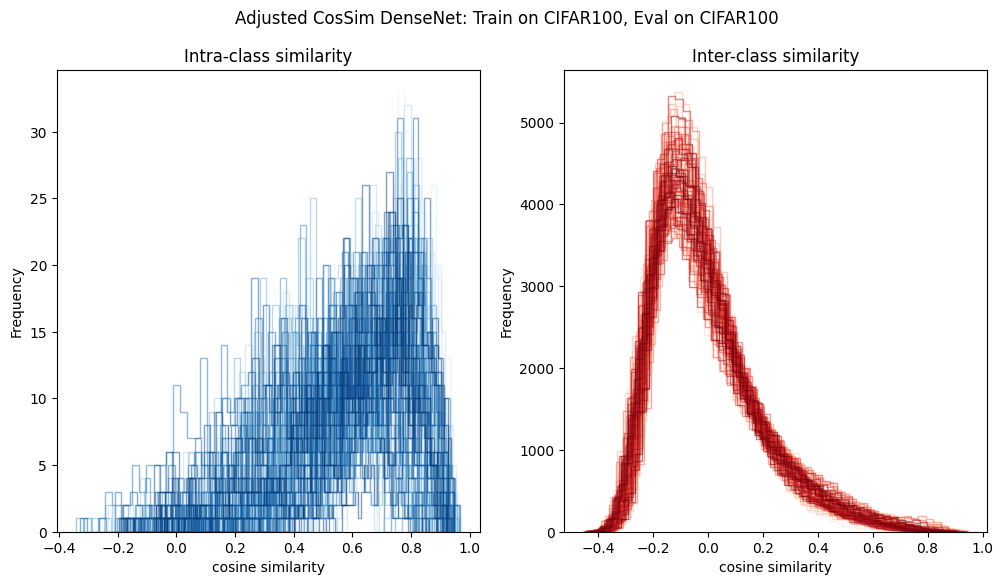

Overall Statistics:
Intra-class Similarity: Mean = 0.5947841125628865, Std = 0.2107665478978761, Var = 0.0444225377127877
Inter-class similarity: Mean = -0.005691984441593152, Std = 0.19218157635170177, Var = 0.03693375828902498



In [113]:
aggregated_hist(adj_cosine_similarity,title='Adjusted CosSim DenseNet: Train on CIFAR100, Eval on CIFAR100')
adj_intra_μ,adj_intra_σ,adj_inter_μ,adj_inter_σ  = get_stats_agg(adj_cosine_similarity)

In [114]:
ts_path = f'.\\results\\{model}\\{dataset}\\{execution_id}\\training_settings.json'
with open(ts_path, 'r') as f:
    content = f.read()

data = json.loads(content)
training_settings = pd.DataFrame(data, index=[0])

print(tabulate(training_settings,headers='keys',tablefmt='pretty'))
report_results(model=data.get('model'),train_set=data.get('train_dataset'),eval_set=data.get('train_dataset'),intra_μ=intra_μ,intra_σ=intra_σ,inter_μ=inter_μ,inter_σ=inter_σ,adj_intra_μ=adj_intra_μ,adj_intra_σ=adj_intra_σ,adj_inter_μ=adj_inter_μ,adj_inter_σ=adj_inter_σ)

+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+
|   |  model   | train_dataset | num_epochs | optimizer |  loss_function   | learning_rate | batch_size | weight_decay | entry_stride | layer_norm | proto_layer | scale | channels |
+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+
| 0 | densenet |   cifar100    |    100     |    SGD    | CrossEntropyLoss |     0.001     |    128     |      0       |      1       |   False    |      4      |  32   |    3     |
+---+----------+---------------+------------+-----------+------------------+---------------+------------+--------------+--------------+------------+-------------+-------+----------+


## DenseNet CIFAR10 on CIFAR100

In [115]:
execution_id = '2024-03-04-16-42-17'
model,dataset = 'densenet', 'cifar10'
model_path = f'./results/{model}/{dataset}/model_{model}_{dataset}.pth'
result_path = f'./results/{model}/{dataset}/{execution_id}/results.json'
print(result_path)

./results/densenet/cifar10/2024-03-04-16-42-17/results.json


In [116]:
with open(result_path, 'r') as f:
    content = f.read()

json_objects = content.split(',\n')

for i,obj in enumerate(json_objects):
    try:
        data = json.loads(obj)
        if data.get('Execution_ID') == execution_id:
            cosine_similarity = data.get('cosine_similarity')
            adj_cosine_similarity = data.get('adj_cos_sim')
            l2_distance = data.get('L2_distance')

    except json.JSONDecodeError:
        print("Error decoding json object. Skipping.")

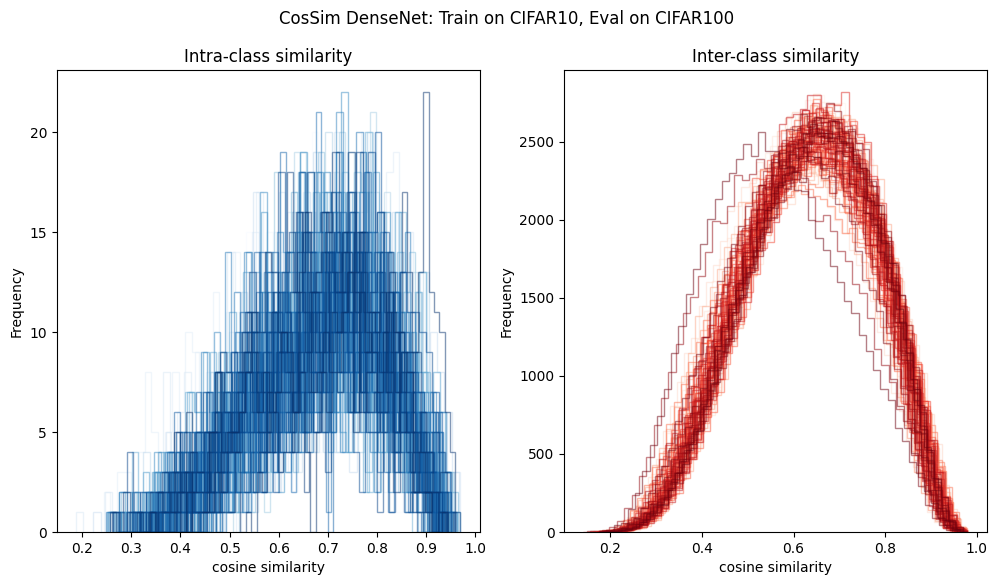

Overall Statistics:
Intra-class Similarity: Mean = 0.6827026343558819, Std = 0.13241920382092726, Var = 0.017534845540568274
Inter-class similarity: Mean = 0.6285149485316226, Std = 0.13939088855088938, Var = 0.01942981981100646



In [117]:
aggregated_hist(cosine_similarity,title='CosSim DenseNet: Train on CIFAR10, Eval on CIFAR100')
intra_μ,intra_σ,inter_μ,inter_σ = get_stats_agg(cosine_similarity)

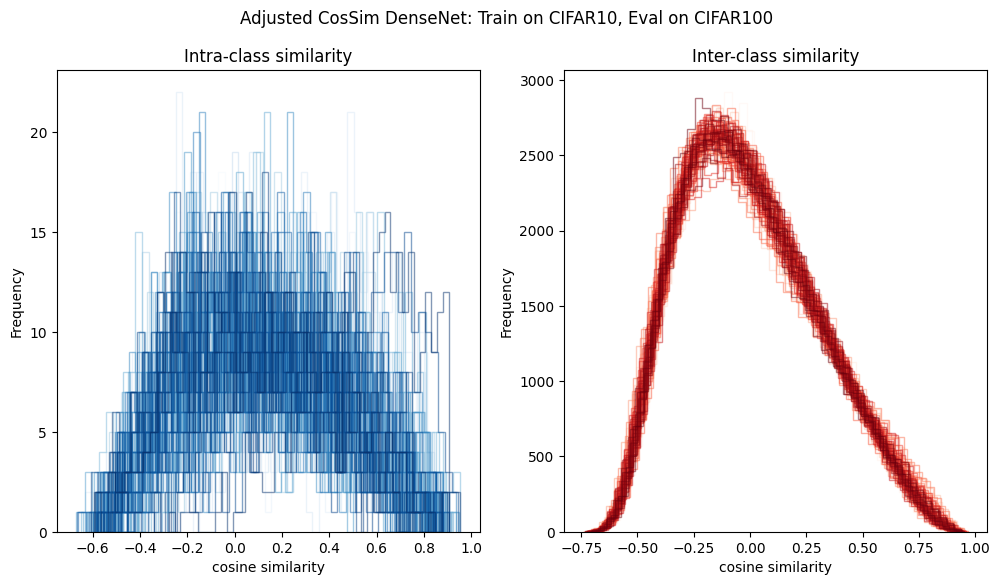

Overall Statistics:
Intra-class Similarity: Mean = 0.13190934999082396, Std = 0.32633965181880215, Var = 0.10649756834921702
Inter-class similarity: Mean = -0.0003672821719232809, Std = 0.30336250190359093, Var = 0.0920288075612062



In [118]:
aggregated_hist(adj_cosine_similarity,title='Adjusted CosSim DenseNet: Train on CIFAR10, Eval on CIFAR100')
adj_intra_μ,adj_intra_σ,adj_inter_μ,adj_inter_σ  = get_stats_agg(adj_cosine_similarity)

In [119]:
report_results(model=model,train_set=dataset,eval_set='CIFAR10',intra_μ=intra_μ,intra_σ=intra_σ,inter_μ=inter_μ,inter_σ=inter_σ,adj_intra_μ=adj_intra_μ,adj_intra_σ=adj_intra_σ,adj_inter_μ=adj_inter_μ,adj_inter_σ=adj_inter_σ)

## DenseNet CIFAR100 on CIFAR10

In [120]:
execution_id = '2024-03-04-17-03-19'
model,dataset = 'densenet', 'cifar100'
model_path = f'./results/{model}/{dataset}/model_{model}_{dataset}.pth'
result_path = f'./results/{model}/{dataset}/{execution_id}/results.json'
print(result_path)

./results/densenet/cifar100/2024-03-04-17-03-19/results.json


In [121]:
with open(result_path, 'r') as f:
    content = f.read()

json_objects = content.split(',\n')

for i,obj in enumerate(json_objects):
    try:
        data = json.loads(obj)
        if data.get('Execution_ID') == execution_id:
            cosine_similarity = data.get('cosine_similarity')
            adj_cosine_similarity = data.get('adj_cos_sim')
            l2_distance = data.get('L2_distance')

    except json.JSONDecodeError:
        print("Error decoding json object. Skipping.")

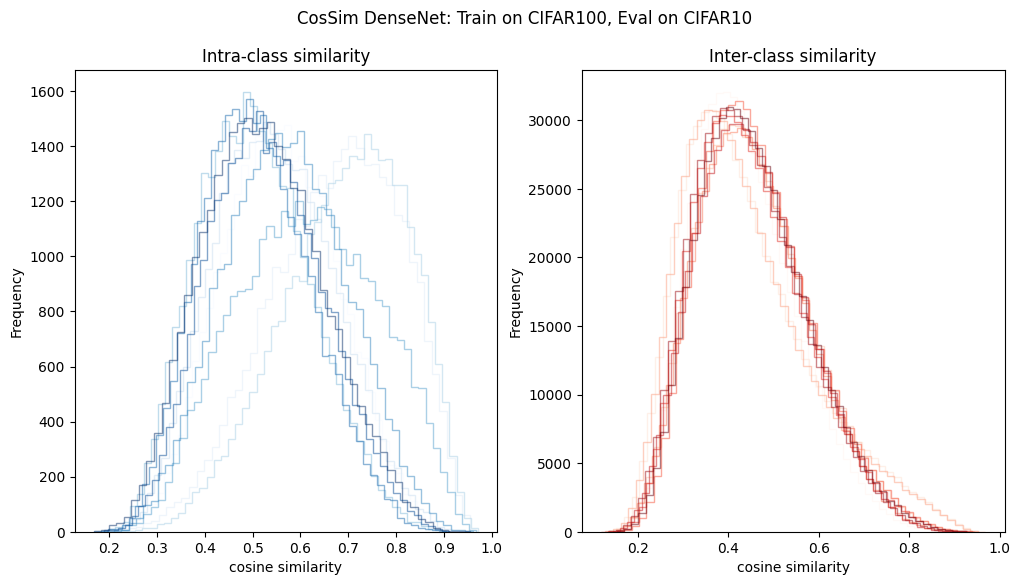

Overall Statistics:
Intra-class Similarity: Mean = 0.571817113531392, Std = 0.1399888272297399, Var = 0.019596871749157967
Inter-class similarity: Mean = 0.4501084673119396, Std = 0.12544357869865214, Var = 0.01573609143672493



In [122]:
aggregated_hist(cosine_similarity,title='CosSim DenseNet: Train on CIFAR100, Eval on CIFAR10')
intra_μ,intra_σ,inter_μ,inter_σ = get_stats_agg(cosine_similarity)

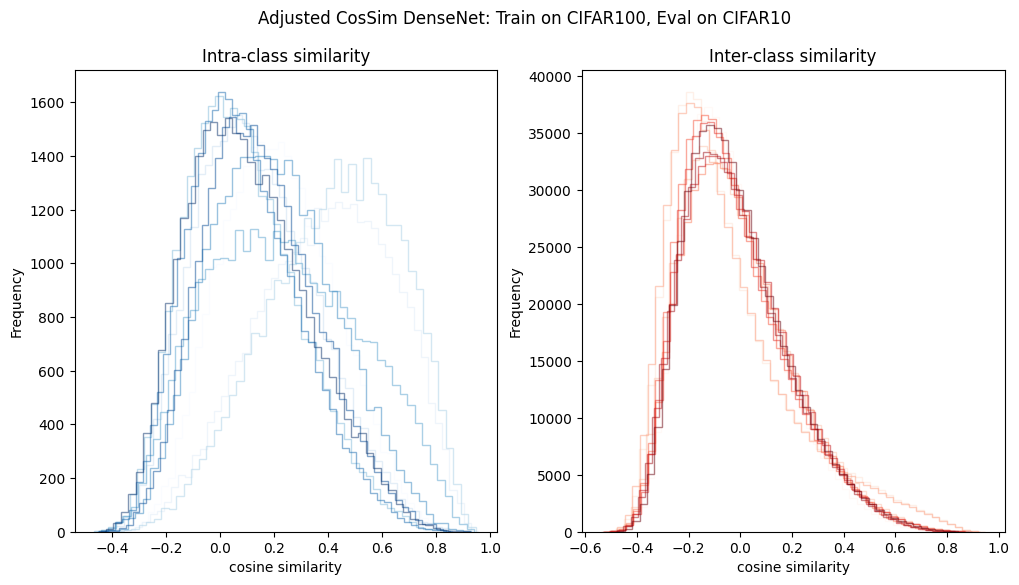

Overall Statistics:
Intra-class Similarity: Mean = 0.20166231340676705, Std = 0.25299096097459645, Var = 0.06400442633484978
Inter-class similarity: Mean = -0.022112245176492865, Std = 0.21152247503076096, Var = 0.0447417574431389



In [123]:
aggregated_hist(adj_cosine_similarity,title='Adjusted CosSim DenseNet: Train on CIFAR100, Eval on CIFAR10')
adj_intra_μ,adj_intra_σ,adj_inter_μ,adj_inter_σ  = get_stats_agg(adj_cosine_similarity)

In [124]:
report_results(model=model,train_set=dataset,eval_set='CIFAR10',intra_μ=intra_μ,intra_σ=intra_σ,inter_μ=inter_μ,inter_σ=inter_σ,adj_intra_μ=adj_intra_μ,adj_intra_σ=adj_intra_σ,adj_inter_μ=adj_inter_μ,adj_inter_σ=adj_inter_σ)

In [8]:

df = pd.read_csv('final_results.txt', delimiter='\t')

print(tabulate(df,headers='keys',tablefmt='pretty'))

+----+--------------+-----------------+----------------+----------------+---------------+----------------------+---------------------+----------------------+---------------------+-------------------------------+------------------------------+-------------------------------+------------------------------+
|    | Architecture |  Training_Set   | Evaluation_Set | Train_Accuracy | Test_Accuracy | Class_Avg_Intra-Mean | Class_Avg_Intra-Std | Class_Avg_Inter-Mean | Class_Avg_Inter-Std | Class_Avg_Adjusted_Intra-Mean | Class_Avg_Adjusted_Intra-Std | Class_Avg_Adjusted_Inter-Mean | Class_Avg_Adjusted_Inter-Std |
+----+--------------+-----------------+----------------+----------------+---------------+----------------------+---------------------+----------------------+---------------------+-------------------------------+------------------------------+-------------------------------+------------------------------+
| 0  |   resnet18   |      mnist      |     mnist      |     99.70%     |    99.70